In [1]:
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import tensorflow as tf

In [2]:
inputs = torch.tensor([
    [0.72, 0.45, 0.31],  # Dream
    [0.75, 0.20, 0.55],  # big
    [0.30, 0.80, 0.40],  # and
    [0.85, 0.35, 0.60],  # work
    [0.55, 0.15, 0.75],  # for
    [0.25, 0.20, 0.85]   # it
])


In [3]:
words = ['Dream', 'big', 'and', 'work', 'for', 'it']

In [4]:
magnitudes = torch.norm(inputs, dim=1)

print("Magnitudes of the vectors:")
for word, magnitude in zip(words, magnitudes):
    print(word, ":", magnitude.item())


Magnitudes of the vectors:
Dream : 0.9038805365562439
big : 0.9513148665428162
and : 0.943398118019104
work : 1.0977249145507812
for : 0.9420722126960754
it : 0.9082951545715332


In [5]:
x_coords = inputs[:, 0].numpy()
y_coords = inputs[:, 1].numpy()
z_coords = inputs[:, 2].numpy()

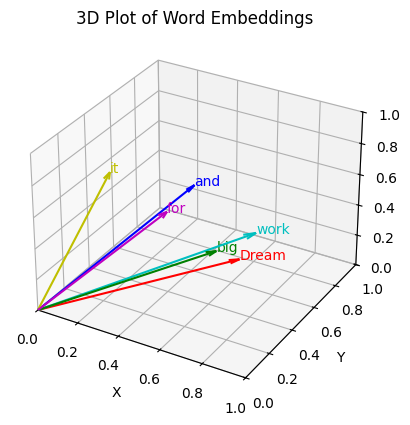

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

colors = ['r', 'g', 'b', 'c', 'm', 'y']

for x, y, z, word, color in zip(x_coords, y_coords, z_coords, words, colors):
    ax.quiver(0, 0, 0, x, y, z, color=color, arrow_length_ratio=0.05)
    ax.text(x, y, z, word, fontsize=10, color=color)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])

plt.title('3D Plot of Word Embeddings')
plt.show()

In [7]:
attn_scores = inputs @ inputs.T
print(attn_scores)

tensor([[0.8170, 0.8005, 0.7000, 0.9555, 0.6960, 0.5335],
        [0.8005, 0.9050, 0.6050, 1.0375, 0.8550, 0.6950],
        [0.7000, 0.6050, 0.8900, 0.7750, 0.5850, 0.5750],
        [0.9555, 1.0375, 0.7750, 1.2050, 0.9700, 0.7925],
        [0.6960, 0.8550, 0.5850, 0.9700, 0.8875, 0.8050],
        [0.5335, 0.6950, 0.5750, 0.7925, 0.8050, 0.8250]])


In [8]:
attn_weights = torch.softmax(attn_scores, dim=-1)
print(attn_weights)

tensor([[0.1766, 0.1738, 0.1571, 0.2029, 0.1565, 0.1330],
        [0.1624, 0.1803, 0.1336, 0.2059, 0.1715, 0.1462],
        [0.1675, 0.1523, 0.2025, 0.1805, 0.1493, 0.1478],
        [0.1648, 0.1789, 0.1376, 0.2115, 0.1672, 0.1400],
        [0.1491, 0.1747, 0.1334, 0.1960, 0.1805, 0.1662],
        [0.1396, 0.1641, 0.1455, 0.1809, 0.1831, 0.1868]])


In [9]:
print("All row sums:", attn_weights.sum(dim=-1))

All row sums: tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])


In [10]:
all_context_vecs = attn_weights @ inputs
print(all_context_vecs)

tensor([[0.5965, 0.3611, 0.5654],
        [0.5982, 0.3431, 0.5794],
        [0.5681, 0.3830, 0.5627],
        [0.6008, 0.3471, 0.5758],
        [0.5859, 0.3377, 0.5900],
        [0.5684, 0.3402, 0.5964]])


In [11]:
context_vec_2 = all_context_vecs[1]
print("Previous 2nd context vector:", context_vec_2)

Previous 2nd context vector: tensor([0.5982, 0.3431, 0.5794])


In [12]:
inputs = torch.cat((inputs, context_vec_2.unsqueeze(0)), dim=0)
words.append('context_vector')

In [13]:
x_coords = inputs[:, 0].numpy()
y_coords = inputs[:, 1].numpy()
z_coords = inputs[:, 2].numpy()

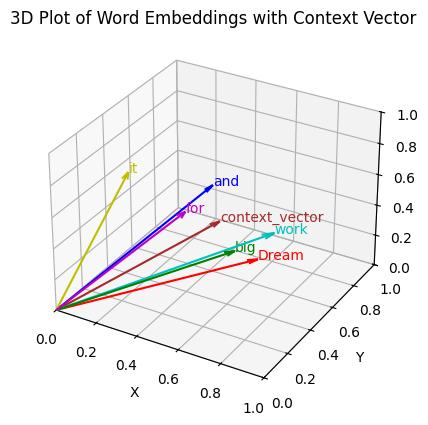

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

colors = ['r', 'g', 'b', 'c', 'm', 'y', 'brown']

for x, y, z, word, color in zip(x_coords, y_coords, z_coords, words, colors):
    ax.quiver(0, 0, 0, x, y, z, color=color, arrow_length_ratio=0.05)
    ax.text(x, y, z, word, fontsize=10, color=color)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])

plt.title('3D Plot of Word Embeddings with Context Vector')
plt.show()

In [15]:
attn_scores_tf = tf.convert_to_tensor(attn_scores.numpy())
attn_weights_tf = tf.nn.softmax(attn_scores_tf)

print("Attention weights (TensorFlow):", attn_weights_tf.numpy())
print("Sum:", attn_weights_tf.numpy().sum(axis=-1))


Attention weights (TensorFlow): [[0.17664889 0.17375809 0.15714423 0.20289002 0.15651692 0.1330419 ]
 [0.16244562 0.18033989 0.13359906 0.20589025 0.1715446  0.14618066]
 [0.16749382 0.15231435 0.20254184 0.18053894 0.14929833 0.14781278]
 [0.16480197 0.17888527 0.13758536 0.21150415 0.16720901 0.1400143 ]
 [0.14905976 0.1747484  0.13339935 0.19604559 0.18052103 0.16622582]
 [0.13959377 0.16406071 0.1455088  0.1808624  0.18313736 0.18683699]]
Sum: [1.        1.0000001 1.        1.0000001 0.9999999 1.       ]
